In [16]:
import os
import re
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anmrt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anmrt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pymorphy3

In [20]:
# Инициализация морфологического анализатора
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [21]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^а-яё\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [22]:
#Оставляет только существительные и возвращает их в начальной форме
def get_nouns_and_normal_form(tokens):
    filtered_tokens = []
    
    for token in tokens:
        # Пропусnbnm короткие слова
        if len(token) <= 2:
            continue
            
        # Морфологический анализ
        parsed = morph.parse(token)[0]
        
        # Оставить только существительные (NOUN)
        if 'NOUN' in parsed.tag:
            # Привести к нормальной форме
            normal_form = parsed.normal_form
            filtered_tokens.append(normal_form)
    
    return filtered_tokens

In [23]:
def tokenize_corpus(corpus):
    tokenized_corpus = []

    for sentence in corpus:
        tokens = word_tokenize(sentence, language='russian')

        # Удалить стоп-слова и короткие слова
        stop_words = set(stopwords.words('russian'))
        filtered_tokens = [
            token for token in tokens
            if token not in stop_words and len(token) > 2
        ]

        # Оставить только существительные в начальной форме
        nouns_only = get_nouns_and_normal_form(filtered_tokens)

        if nouns_only:
            tokenized_corpus.append(nouns_only)

    return tokenized_corpus

In [24]:
def save_processed_data(tokenized_corpus, filename='processed_corpus.txt'):
    with open(filename, 'w', encoding='utf-8') as f:
        for tokens in tokenized_corpus:
            f.write(' '.join(tokens) + '\n')
    print("сохранено")
    print(filename)

In [25]:
with open('HP1RUS.txt', 'r', encoding='utf-8') as infile, \
     open('Data.txt', 'w', encoding='utf-8') as outfile:
    lines = infile.readlines()
    outfile.writelines(lines[7:])

In [26]:
with open('Data.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [27]:
processed_text = preprocess_text(text)
sentences = nltk.sent_tokenize(processed_text, language='russian')

In [28]:
print(len(sentences)) #вывод 1, поскольку это все 1 строка в обработанном тексте

1


In [30]:
tokenized_corpus = tokenize_corpus(sentences)

In [31]:
save_processed_data(tokenized_corpus)

сохранено
processed_corpus.txt


In [32]:
# Всего токенов
print(sum(len(tokens) for tokens in tokenized_corpus))

16821


In [33]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [36]:
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,
    window=5,             # размер окна контекста
    min_count=3,          # минимальная частота слова
    sg=1,                 # алгоритм Skip-Gram (при 1) или CBOW (0)
    workers=4,            # количество ядер процессора
    epochs=20
)

In [37]:
print(len(model.wv.key_to_index)) # Размер словаря слов

946


In [38]:
model.save("harry_potter_rus.model")

In [39]:
def print_similar_words(model, word, topn=10):
    if word in model.wv:
        similar = model.wv.most_similar(word, topn=topn)
        print(f"\nБлижайшие слова к '{word}':")
        for i, (similar_word, similarity) in enumerate(similar, 1):
            print(f"{i:2d}. {similar_word:<15} {similarity:.4f}")

In [40]:
characters = ['гарри', 'гермиона', 'рон', 'волдеморт', 'снейп', 'мальфой']
for character in characters:
    print_similar_words(model, character)


Ближайшие слова к 'гарри':
 1. лазарет         0.8698
 2. мгновение       0.8561
 3. снег            0.8522
 4. кошмар          0.8484
 5. оценка          0.8471
 6. предлог         0.8460
 7. рональд         0.8386
 8. веснушка        0.8384
 9. распоряжение    0.8365
10. район           0.8361

Ближайшие слова к 'гермиона':
 1. эрмион          0.8741
 2. лекция          0.8484
 3. намерение       0.8362
 4. грейнджер       0.8259
 5. настой          0.8229
 6. беспокойство    0.8195
 7. проклятие       0.8163
 8. спичка          0.8149
 9. пинс            0.8128
10. безопасность    0.8086

Ближайшие слова к 'рон':
 1. скабберс        0.7986
 2. значок          0.7783
 3. развлечение     0.7658
 4. брат            0.7641
 5. шахматы         0.7626
 6. район           0.7617
 7. предлог         0.7591
 8. распоряжение    0.7584
 9. сэндвич         0.7512
10. пинс            0.7496

Ближайшие слова к 'волдеморт':
 1. долька          0.8471
 2. джеймс          0.8426
 3. раздражение    

In [41]:
test_words = ['гарри', 'гермиона', 'рон', 'малфой', 'волдеморт', 'дамблдор']
for word in test_words:
    if word in model.wv:
        print(f"Слово '{word}' есть в словаре")
    else:
        print(f"Слова '{word}' нет в словаре")

Слово 'гарри' есть в словаре
Слово 'гермиона' есть в словаре
Слово 'рон' есть в словаре
Слово 'малфой' есть в словаре
Слово 'волдеморт' есть в словаре
Слово 'дамблдор' есть в словаре


In [42]:
# Векторная арифметика
def word_analogy(model, positive, negative, topn=5):
    result = model.wv.most_similar(positive=positive, negative=negative, topn=topn)
    print(f"\nАналогия: {positive} - {negative} = ?")
    for i, (word, similarity) in enumerate(result, 1):
        print(f"{i:2d}. {word:<15} {similarity:.4f}")
    return result

In [45]:
word_analogy(model, positive=['гарри', 'гриффиндор'], negative=['малфой'])
word_analogy(model, positive=['волдеморт', 'зло'], negative=['гарри'])


Аналогия: ['гарри', 'гриффиндор'] - ['малфой'] = ?
 1. хаффлпафф       0.8225
 2. столетие        0.8063
 3. сто             0.8063
 4. чемпионат       0.8022
 5. потеря          0.7897

Аналогия: ['волдеморт', 'зло'] - ['гарри'] = ?
 1. ученик          0.7266
 2. сортировка      0.7106
 3. церемония       0.6958
 4. долька          0.6807
 5. смысл           0.6741


[('ученик', 0.7266328930854797),
 ('сортировка', 0.7105851173400879),
 ('церемония', 0.6957505941390991),
 ('долька', 0.6807422041893005),
 ('смысл', 0.6741114854812622)]

In [46]:
def visualize_words(model, words_to_visualize, figsize=(12, 10)):
    words = []
    vectors = []
    
    for word in words_to_visualize:
        if word in model.wv:
            words.append(word)
            vectors.append(model.wv[word])
    
    if len(vectors) < 2:
        print("Недостаточно слов для визуализации")
        return
    
    vectors = np.array(vectors)
    
    pca = PCA(n_components=2) # PCA для уменьшения размерности до 2D
    reduced_vectors = pca.fit_transform(vectors)
    
    plt.figure(figsize=figsize)
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)
    
    for i, word in enumerate(words):
        plt.annotate(word, 
                    (reduced_vectors[i, 0], reduced_vectors[i, 1]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=12,
                    alpha=0.8)
    
    plt.title('Word2Vec')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return reduced_vectors

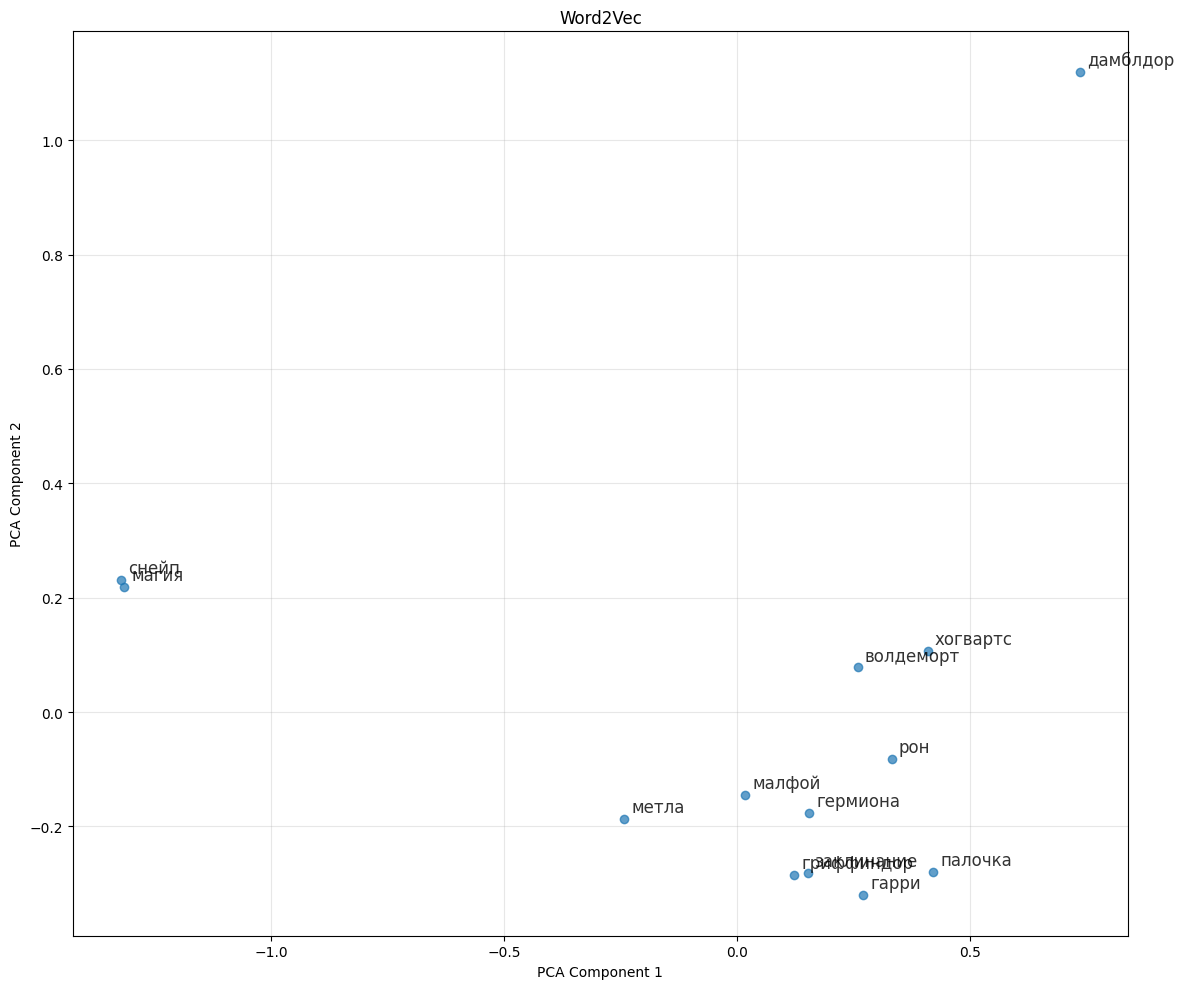

In [ ]:
key_words = [
    'гарри', 'гермиона', 'рон', 'дамблдор', 'волдеморт', 
    'снейп', 'малфой', 'хогвартс', 'гриффиндор', 'слизерин',
    'заклинание', 'палочка', 'метла', 'квидич', 'магия'
]

reduced_vectors = visualize_words(model, key_words)

In [47]:
good_characters = ['гарри', 'гермиона', 'рон', 'дumbledор', 'хагрид']
bad_characters = ['волдеморт', 'мальфой', 'снейп']  # Снейп под вопросом
hogwarts_houses = ['гриффиндор', 'слизерин', 'когтевран', 'пуффендуй']

print("\nПоложительные персонажи:")
for char in good_characters:
    print_similar_words(model, char, topn=5)

print("\nОтрицательные персонажи:")
for char in bad_characters:
    print_similar_words(model, char, topn=5)


Положительные персонажи:

Ближайшие слова к 'гарри':
 1. лазарет         0.8698
 2. мгновение       0.8561
 3. снег            0.8522
 4. кошмар          0.8484
 5. оценка          0.8471

Ближайшие слова к 'гермиона':
 1. эрмион          0.8741
 2. лекция          0.8484
 3. намерение       0.8362
 4. грейнджер       0.8259
 5. настой          0.8229

Ближайшие слова к 'рон':
 1. скабберс        0.7986
 2. значок          0.7783
 3. развлечение     0.7658
 4. брат            0.7641
 5. шахматы         0.7626

Ближайшие слова к 'хагрид':
 1. бровь           0.8245
 2. крыльцо         0.8165
 3. коготь          0.8115
 4. вор             0.8095
 5. незнакомец      0.8003

Отрицательные персонажи:

Ближайшие слова к 'волдеморт':
 1. долька          0.8471
 2. джеймс          0.8426
 3. раздражение     0.8398
 4. род             0.8205
 5. имя             0.8200

Ближайшие слова к 'снейп':
 1. безопасность    0.8655
 2. род             0.8586
 3. урок            0.8329
 4. защита        

In [48]:
# Cемантические расстояния между персонажами
def calculate_similarity(model, word1, word2):
    if word1 in model.wv and word2 in model.wv:
        similarity = model.wv.similarity(word1, word2)
        print(f"Схожесть между '{word1}' и '{word2}': {similarity:.4f}")
        return similarity

In [49]:
calculate_similarity(model, 'гарри', 'гермиона')
calculate_similarity(model, 'гарри', 'рон')
calculate_similarity(model, 'гарри', 'малфой')
calculate_similarity(model, 'гарри', 'волдеморт')
calculate_similarity(model, 'снейп', 'дамблдор')
calculate_similarity(model, 'снейп', 'волдеморт')

Схожесть между 'гарри' и 'гермиона': 0.6262
Схожесть между 'гарри' и 'рон': 0.7163
Схожесть между 'гарри' и 'малфой': 0.6356
Схожесть между 'гарри' и 'волдеморт': 0.5973
Схожесть между 'снейп' и 'дамблдор': 0.8220
Схожесть между 'снейп' и 'волдеморт': 0.6887


np.float32(0.68871564)

In [50]:
# Поиск слов, которые находятся между двумя концепциями
def find_between_words(model, word1, word2, topn=10):
    if word1 in model.wv and word2 in model.wv:
        result = model.wv.most_similar(positive=[word1, word2], topn=topn)
        print(f"\nСлова между '{word1}' и '{word2}':")
        for i, (word, similarity) in enumerate(result, 1):
            print(f"{i:2d}. {word:<15} {similarity:.4f}")

In [51]:
find_between_words(model, 'дамблдор', 'волдеморт')


Слова между 'дамблдор' и 'волдеморт':
 1. долька          0.9394
 2. защита          0.9144
 3. род             0.9075
 4. кипу            0.9074
 5. джеймс          0.9003
 6. потрясение      0.8965
 7. росток          0.8958
 8. подозрение      0.8945
 9. раздражение     0.8929
10. сила            0.8836


In [52]:
find_between_words(model, 'гарри', 'гриффиндор')


Слова между 'гарри' и 'гриффиндор':
 1. нарушение       0.9300
 2. болтовня        0.9227
 3. пенальти        0.9152
 4. шанс            0.9130
 5. предлог         0.9127
 6. первокурсник    0.9004
 7. хаффлпафф       0.8933
 8. фол             0.8909
 9. минутка         0.8892
10. щека            0.8869


In [53]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [55]:
import pandas as pd

In [56]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import nbformat

In [59]:
def interactive_plotly_visualization(model, words_list, title="Word2Vec 3d"):
    # Получение векторов
    words = []
    vectors = []
    for word in words_list:
        if word in model.wv:
            words.append(word)
            vectors.append(model.wv[word])
    
    vectors = np.array(vectors)
    
    # PCA для 3 компонентов
    pca = PCA(n_components=3)
    vectors_3d = pca.fit_transform(vectors)
    
    # Отдельный датафрейм
    df = pd.DataFrame(vectors_3d, columns=['x', 'y', 'z'])
    df['word'] = words
    df['cluster'] = [word.split('_')[0] if '_' in word else 'other' for word in words]
    
    fig = px.scatter_3d(
        df, x='x', y='y', z='z', 
        text='word',
        title=title,
        hover_name='word',
        size_max=18,
        opacity=0.8
    )
    
    fig.update_traces(
        textposition='top center',
        marker=dict(size=8, line=dict(width=2, color='DarkSlateGrey'))
    )
    
    fig.show()
    
    return df

In [60]:
character_words = [
    'гарри', 'гермиона', 'рон', 'дамблдор', 'волдеморт',
    'снейп', 'малфой', 'хагрид', 'невилл', 'луна'
]
interactive_plotly_visualization(model, character_words)

,x,y,z,word,cluster
0,0.296825,0.200223,-0.032880,гарри,other
1,0.204147,-0.190560,0.644381,гермиона,other
2,0.500958,-0.411286,0.529008,рон,other
3,-0.470061,-0.441602,-0.146751,дамблдор,other
4,-1.908325,0.086730,-0.481125,волдеморт,other
5,-0.598105,-0.770398,0.452417,снейп,other
6,0.991292,-0.450488,-1.073747,малфой,other
7,0.107368,1.551663,0.073560,хагрид,other
8,0.760123,-0.134503,-0.078996,невилл,other
9,0.115780,0.560221,0.114132,луна,other


In [61]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [62]:
def similarity_heatmap(model, words_list, figsize=(12, 10)):    
    # Фильтрация слов, которые есть в модели
    valid_words = [word for word in words_list if word in model.wv]
    
    similarity_matrix = np.zeros((len(valid_words), len(valid_words)))
    
    for i, word1 in enumerate(valid_words):
        for j, word2 in enumerate(valid_words):
            similarity_matrix[i, j] = model.wv.similarity(word1, word2)
    
    plt.figure(figsize=figsize)
    
    cmap = LinearSegmentedColormap.from_list('custom_red_blue', ['#1f77b4', '#ffffff', '#d62728'])
    
    sns.heatmap(
        similarity_matrix,
        xticklabels=valid_words,
        yticklabels=valid_words,
        annot=True,
        fmt='.2f',
        cmap=cmap,
        center=0.5,
        square=True,
        cbar_kws={'label': 'Семантическая схожесть'}
    )
    
    plt.title('Тепловавя карта')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return similarity_matrix, valid_words

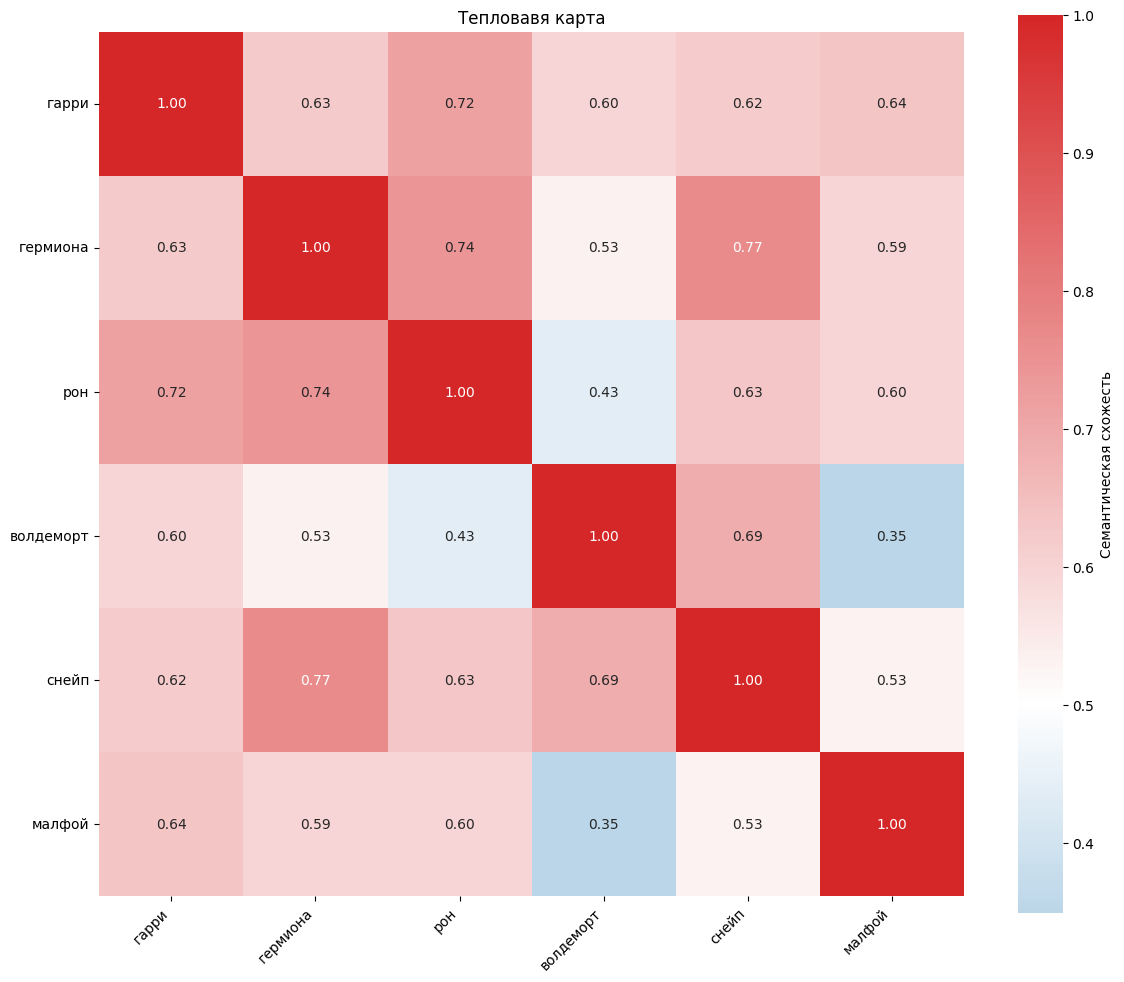

In [63]:
main_characters = ['гарри', 'гермиона', 'рон', 'дамблдорр', 'волдеморт', 'снейп', 'малфой']
similarity_matrix, words = similarity_heatmap(model, main_characters)

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [65]:
def word_dendrogram(model, words_list, method='ward', figsize=(15, 10)):
    valid_words = [word for word in words_list if word in model.wv]
    vectors = [model.wv[word] for word in valid_words]
    
    # Расстояния
    distance_matrix = pdist(vectors, metric='cosine')
    
    # Иерархическая кластеризация
    linkage_matrix = linkage(distance_matrix, method=method)
    
    plt.figure(figsize=figsize)
    dendrogram(
        linkage_matrix,
        labels=valid_words,
        orientation='right',
        leaf_font_size=12,
        color_threshold=0.7 * max(linkage_matrix[:, 2])
    )
    
    plt.title('Дендрограмма кластеризации слов')
    plt.xlabel('Расстояние')
    plt.tight_layout()
    plt.show()
    
    return linkage_matrix

thematic_words = [
    'гарри', 'гермиона', 'рон',
    'дамблдор', 'снейп', 'макгонагалл',
    'волдеморт', 'малфой', 'болот',
    'хогвартс', 'гриффиндор', 'слизерин',
    'заклинание', 'палочка', 'метла',
    'квидич', 'матч', 'гонг',
]

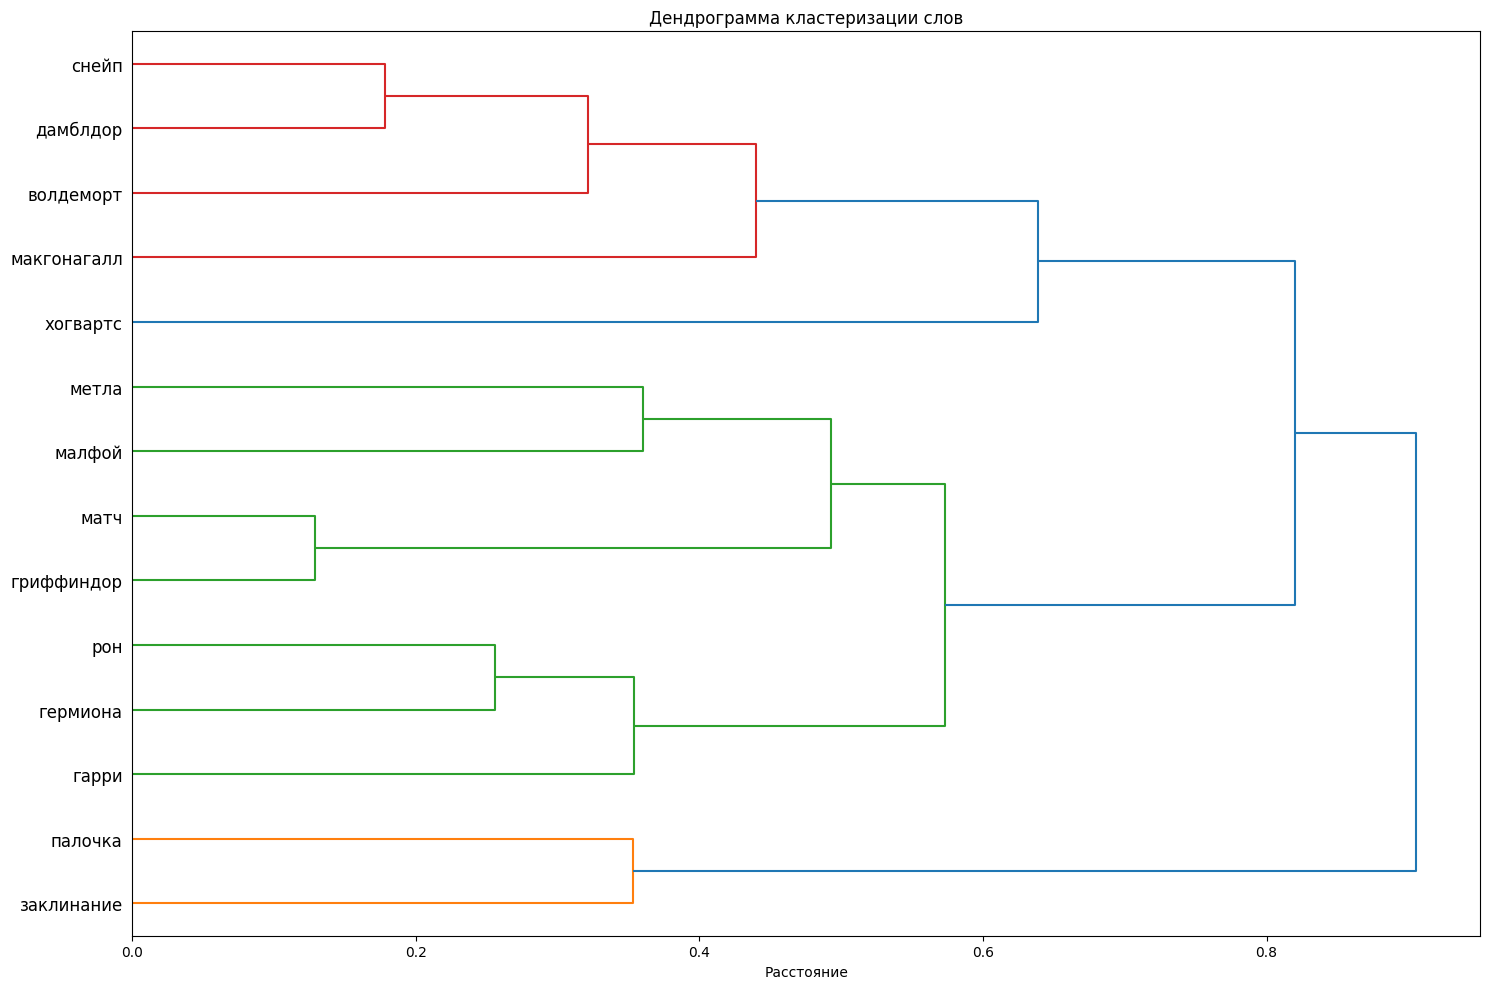

In [66]:
linkage_matrix = word_dendrogram(model, thematic_words)